**Nama  : Steven Christ Pinantyo Arwidarasto**

**NIM   : 064092100002**

**Kelas : DSDA | A **

> 2.

In [ ]:
import pandas as pd
#Melakukan import LabelEncoder untuk preprocessing transformasi
from sklearn import preprocessing
#Pembentukan countplot
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Universitas Pancasila/Universitas Pancasila Teknik Informatika/Semester 5/DSDA/train.csv')

> A. Tampilkan 10 data teratas untuk mendapatkan gambaran dari
dataset yang tersedia.

In [ ]:
df.head(10)

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,Education_level,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,1985,Y,1,level_0,2.86,2011,4,2,3,2,3,0,46.37,0.0,0
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,1989,Y,0,level_1,7.28,2007,4,4,3,0,0,1,47.68,0.0,0
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,1970,Y,1,level_1,0.00,1989,28,10,9,6,2,1,40.73,0.0,0
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,1967,Y,2,level_1,0.00,1987,29,11,6,0,4,10,47.42,0.0,1
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,1965,Y,3,level_1,7.20,1985,30,9,8,2,3,0,47.18,0.0,0
5,JG05,2.828427,PG06,2.121320,1.118034,RM_type_A,1,1971,Y,3,level_1,0.00,1990,28,7,9,4,0,0,48.46,0.0,0
6,JG05,2.828427,PG06,2.345208,2.102380,RM_type_A,1,1969,Y,2,level_1,0.00,1988,29,8,6,2,8,0,60.38,0.0,0
7,JG05,2.828427,PG06,2.236068,1.581139,RM_type_C,2,1968,Y,2,level_1,0.00,1987,29,6,8,1,3,4,14.71,0.0,0
8,JG04,1.118034,PG03,1.118034,0.412311,RM_type_B,1,1989,Y,0,level_1,3.01,2007,3,2,2,0,9,0,26.76,0.0,0
9,JG04,1.118034,PG03,1.118034,0.412311,RM_type_B,2,1991,N,0,level_1,4.19,2009,3,2,2,0,3,0,41.45,0.0,1


> B. Berapa jumlah baris dan kolomnya, sebutkan nama kolomnya dan
tipe data pada masing-masing kolom, apakah anda melihat
beberapa kondisi yang membutuhkan penanganan sehingga data
siap untuk tahap berikutnya?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11153 entries, 0 to 11152
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   job_level                              11153 non-null  object 
 1   job_duration_in_current_job_level      11153 non-null  float64
 2   person_level                           11153 non-null  object 
 3   job_duration_in_current_person_level   11153 non-null  float64
 4   job_duration_in_current_branch         11153 non-null  float64
 5   Employee_type                          11153 non-null  object 
 6   gender                                 11153 non-null  int64  
 7   age                                    11153 non-null  int64  
 8   marital_status_maried(Y/N)             11153 non-null  object 
 9   number_of_dependences                  11153 non-null  int64  
 10  Education_level                        11153 non-null  object 
 11  GP

> Jawaban: Dari data diatas maka tipe data yang ada pada dataframe tersebut adalah float, nt dan object. Selain itu dibutuhkan penanganan data cleaning. Hal ini dikarenakan jumlah total rekord data merupakan 11153 data dan untuk nilai non-null dari field last_achievement dan achievement_above_100 adalah sebesar 11152 yang berarti ada 1 rekord dari masing-masing field adalah null.
Untuk jumlah kolumnnya maka terdapat total 22 kolom

> C. Bagaimana deskripsi datasetnya (jumlah item datanya, nilai mean,
median, max, min, dan nilai kuartilnya) ?

In [ ]:
df.describe()

,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,gender,age,number_of_dependences,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
count,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11153.000000,11152.000000,11152.000000,11153.000000
mean,1.433208,1.349218,1.034646,1.735587,1985.837084,0.995517,3.176195,2009.174124,6.277952,3.720165,3.505694,1.202726,3.664216,1.100152,72.234902,0.679071,0.146777
std,0.431086,0.324660,0.416723,0.441040,4.632214,0.881103,13.321687,4.117162,5.033553,2.399068,1.818028,2.575138,2.652648,2.714525,23.030421,1.107381,0.353899
min,0.000000,0.000000,0.000000,1.000000,1963.000000,0.000000,0.000000,1982.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,4.510000,0.000000,0.000000
25%,1.224745,1.224745,0.707107,1.000000,1985.000000,0.000000,2.820000,2008.000000,4.000000,2.000000,2.000000,0.000000,2.000000,0.000000,56.650000,0.000000,0.000000
50%,1.352775,1.352775,1.118034,2.000000,1987.000000,1.000000,3.070000,2010.000000,5.000000,3.000000,3.000000,0.000000,3.000000,0.000000,71.675000,0.000000,0.000000
75%,1.414214,1.385641,1.224745,2.000000,1989.000000,2.000000,3.270000,2012.000000,6.000000,4.000000,4.000000,1.000000,5.000000,1.000000,88.172500,1.000000,0.000000
max,2.958040,2.828427,2.677686,2.000000,1997.000000,7.000000,378.000000,2019.000000,36.000000,22.000000,15.000000,29.000000,21.000000,77.000000,130.000000,3.000000,1.000000


> Jawaban: Sesuai fungsi .describe() penulis menemukan nilai data mean, median, max, min dan nilai kuartil dari beberapa field. Salah satu contohnya adalah last_achievement yaitu total item data 11152 data dengan mean 72,2, min sebesar 4,5, kuartil 50% sebesar 71.7 dan nilai max sebesar 130

> D. Identifikasi setiap nilai unik dari kolom berikut: job_level,
person_level, Employee_type, achievement_target_1.

In [ ]:
print("Nilai unique dari job_level adalah = {}".format(df['job_level'].unique()))
print("Nilai unique dari person_level adalah = {}".format(df['person_level'].unique()))
print("Nilai unique dari Employee_type adalah = {}".format(df['Employee_type'].unique()))
print("Nilai unique dari achievement_target_1 adalah = {}".format(df['Achievement_above_100%_during3quartal'].unique()))

Nilai unique dari job_level adalah = ['JG04' 'JG05' 'JG03']
Nilai unique dari person_level adalah = ['PG03' 'PG06' 'PG05' 'PG04' 'PG07' 'PG02' 'PG01' 'PG08']
Nilai unique dari Employee_type adalah = ['RM_type_A' 'RM_type_C' 'RM_type_B']
Nilai unique dari achievement_target_1 adalah = [ 0.  1.  2.  3. nan]


> Jawab : Untuk mendapatkan nilai uniquenya maka penulis menggunakan fungsi .unique(). Salah satu contohnya adalah nilai unique dari job_level adalah JG04, JG05, JG03

> E. Ubah tipe data pada kolom job_level dan person_level menjadi
data bertipe kategori

In [ ]:
df['person_level'].str.replace('PG','').astype('int')
df['job_level'].str.replace('JG','').astype('int')

0        4
1        4
2        5
3        5
4        5
        ..
11148    4
11149    4
11150    4
11151    4
11152    4
Name: job_level, Length: 11153, dtype: int64

> Jawaban: Disini saya melakukan penggantian string PG untuk person level dan JG untuk job level dengan whitespace atau spasi. Lalu saya ubah tipe data dengan menggunakan astype('tipe data') menjadi integer.

> F. Lakukan preprocessing pada kolom Education_level dan GPA.
Berapa prosentase SDM pada setiap level pada kolom
Education_level? Apa yang harus diperbaiki dari kolom GPA?


In [ ]:
#Disini saya inisialisasi LabelEncoder untuk mengganti nilai string menjadi nilai integer yang dimulai dari nilai 0
label = preprocessing.LabelEncoder()

#Tranformasi nilai Education_level dan GPA menjadi numerik
df['Education_level'] = label.fit_transform(df['Education_level'])
df['Education_level'].describe()

count    11153.000000
mean         3.808841
std          0.489346
min          0.000000
25%          4.000000
50%          4.000000
75%          4.000000
max          5.000000
Name: Education_level, dtype: float64

In [ ]:
min = 0
max = 4
gpamin = df['GPA'].min()
gpamax = df['GPA'].max()
df['GPA']  = ((df['GPA']-gpamin)*(max-min)/(gpamax-gpamin))+min
df['GPA'].describe()

count    11153.000000
mean         0.033611
std          0.140970
min          0.000000
25%          0.029841
50%          0.032487
75%          0.034603
max          4.000000
Name: GPA, dtype: float64

> Jawaban : Untuk preprocessing kolom Education_level maka akan digunakan LabelEncoder untuk menganti nilai string tersebut menjadi nilai integer 0-seterusnya. Dalam halnya nilai GPA, perlunya diperbaiki range nilai tersebut. Sesuai describe(), nilai GPA berada pada interval 0-378 akan tetapi GPA berada pada interval 0-4 maka dibutuhkannya normalisasi min max

> G. Tampilkan dalam format grafik komposisi SDM dengan Best
Performance = 0 dan 1.(gunakan countplot)


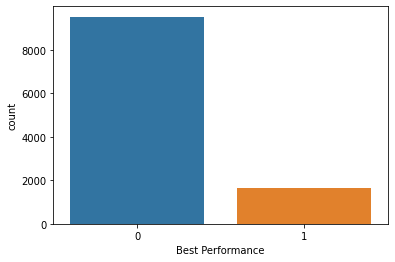

In [ ]:
sns.countplot(x = df['Best Performance'])
plt.show()

> Jawab : Dihasilkan pekerja dengan best performa dengan estimasi jumlah kurang dari 2000

> H. Tampilkan komposisi Best Performance berdasarkan tipe SDM
pada kolom Employes_type. (gunakan countplot)

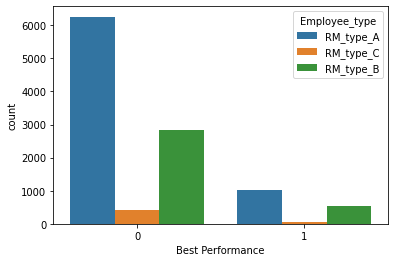

In [ ]:
sns.countplot(x = df['Best Performance'], hue=df['Employee_type'])
plt.show()